In [66]:
from collections import Counter
import re
from string import punctuation

import numpy as np
import pandas as pd
from pylab import mpl, plt
%matplotlib inline
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = (10, 6)

import spacy
from spacy import displacy
nlp = spacy.load('en_core_web_sm')

from nltk import ngrams
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import sent_tokenize, word_tokenize

from wordcloud import WordCloud

from dotenv import find_dotenv, get_key
api_key = get_key(find_dotenv(), 'NEWSAPI_API_KEY')

from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key=api_key)

---

In [4]:
btc_headlines = newsapi.get_everything(
    q='bitcoin',
    language='en',
    sort_by='relevancy',
)
eth_headlines = newsapi.get_everything(
    q='ethereum',
    language='en',
    sort_by='relevancy'
)

In [28]:
sentiments = []
for articles in btc_headlines['articles']:
    try:
        text = articles['content']
        results = analyzer.polarity_scores(text)
        compound = results['compound']
        pos = results['pos']
        neu = results['neu']
        neg = results['neg']
        sentiments.append({
            'text': text,
            'Compound': compound,
            'Positive': pos,
            'Negative': neg,
            'Neutral': neu,
        })
    except AttributeError:
        pass
    
btc = pd.DataFrame(sentiments)
btc

,text,Compound,Positive,Negative,Neutral
0,Just weeks after Tesla started accepting Bitco...,0.3818,0.071,0.000,0.929
1,Shares of Square are up more than 6% today aft...,0.2960,0.058,0.000,0.942
2,Tesla’s relationship with bitcoin is not a dal...,0.0000,0.000,0.000,1.000
3,Image: Tesla\r\n\n \n\n Tesla has stopped acce...,0.4939,0.134,0.050,0.816
4,Cryptocurrency prices continued to tumble Frid...,0.0000,0.000,0.000,1.000
5,"Mark Zuckerberg posted a picture of his two, f...",0.8455,0.217,0.000,0.783
6,Illustration by Alex Castro / The Verge\r\n\n ...,0.0000,0.000,0.000,1.000
7,"Last week, whenElon Musk tweeted that he had s...",0.4754,0.075,0.000,0.925
8,Tesla CEO Elon Musk has changed his stance on ...,0.3818,0.071,0.000,0.929
9,image copyrightGetty Images\r\nimage captionEl...,0.7003,0.167,0.000,0.833


In [33]:
btc.describe().style.background_gradient(axis=1)

,Compound,Positive,Negative,Neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.289760,0.086100,0.025700,0.888300
std,0.394596,0.073062,0.047159,0.080912
min,-0.762700,0.000000,0.000000,0.777000
25%,0.000000,0.000000,0.000000,0.821000
50%,0.342950,0.071000,0.000000,0.853000
75%,0.545500,0.159000,0.052500,0.956500
max,0.845500,0.217000,0.180000,1.000000


In [27]:
sentiments = []
for articles in eth_headlines['articles']:
    try:
        text = articles['content']
        results = analyzer.polarity_scores(text)
        compound = results['compound']
        pos = results['pos']
        neu = results['neu']
        neg = results['neg']
        sentiments.append({
            'text': text,
            'Compound': compound,
            'Positive': pos,
            'Negative': neg,
            'Neutral': neu,
        })
    except AttributeError:
        pass
    
eth = pd.DataFrame(sentiments)
eth

,text,Compound,Positive,Negative,Neutral
0,"Vitalik Buterin, the creator of Ethereum, on W...",0.2263,0.060,0.000,0.940
1,Their investors call them disruptive innovator...,-0.4019,0.072,0.150,0.778
2,Solana isn’t known yet outside of the crypto c...,0.4019,0.083,0.000,0.917
3,New York (CNN Business)Bitcoin prices continue...,0.0000,0.000,0.000,1.000
4,"The creators behind CryptoPunks, one of the mo...",0.4754,0.091,0.000,0.909
5,"Bitcoin, Ethereum and a host of Altcoins suffe...",-0.2023,0.066,0.087,0.847
6,By Reuters Staff\r\nFILE PHOTO: A representati...,0.0000,0.000,0.000,1.000
7,A representation of virtual currency Ethereum ...,0.0000,0.000,0.000,1.000
8,"It took a while to get here, but Dfinity is fi...",0.0000,0.000,0.000,1.000
9,This story originally appeared on StockMarketU...,0.0000,0.000,0.000,1.000


In [34]:
eth.describe().style.background_gradient(axis=1)

,Compound,Positive,Negative,Neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.079965,0.039850,0.015550,0.944600
std,0.275544,0.052982,0.040203,0.069714
min,-0.401900,0.000000,0.000000,0.778000
25%,0.000000,0.000000,0.000000,0.917750
50%,0.000000,0.019000,0.000000,0.958000
75%,0.152575,0.067500,0.000000,1.000000
max,0.817600,0.210000,0.150000,1.000000


In [52]:
lemmatizer = WordNetLemmatizer()

sw = stopwords.words('english')
sw = sw + ['u', 'it', '\'s', 'n\'t', '…', '\`', '``', 'char', '\'\'']
sw = set(sw)

def tokenizer (text):
    words = word_tokenize(text)
    words = list(filter(lambda w: w.lower(), words))
    words = list(filter(lambda t: t not in punctuation, words))
    words = list(filter(lambda t: t.lower() not in sw, words))
    tokens = [lemmatizer.lemmatize(word) for word in words]
    return tokens

btc['tokens'] = btc.text.apply(tokenizer)
btc.head()

eth['tokens'] = eth.text.apply(tokenizer)
eth.head()

,text,Compound,Positive,Negative,Neutral,tokens
0,"Vitalik Buterin, the creator of Ethereum, on W...",0.2263,0.060,0.00,0.940,"[Vitalik, Buterin, creator, Ethereum, Wednesda..."
1,Their investors call them disruptive innovator...,-0.4019,0.072,0.15,0.778,"[investor, call, disruptive, innovator, Detrac..."
2,Solana isn’t known yet outside of the crypto c...,0.4019,0.083,0.00,0.917,"[Solana, ’, known, yet, outside, crypto, commu..."
3,New York (CNN Business)Bitcoin prices continue...,0.0000,0.000,0.00,1.000,"[New, York, CNN, Business, Bitcoin, price, con..."
4,"The creators behind CryptoPunks, one of the mo...",0.4754,0.091,0.00,0.909,"[creator, behind, CryptoPunks, one, popular, N..."


In [55]:
N = 2
grams = ngrams(tokenizer(btc.text.str.cat()), N)
Counter(grams).most_common(20)

[(('Elon', 'Musk'), 5),
 (('accepting', 'Bitcoin'), 2),
 (('char', 'Tesla'), 2),
 (('CEO', 'Elon'), 2),
 (('price', 'continued'), 2),
 (('outage', 'morning'), 2),
 (('week', 'Tesla'), 1),
 (('Tesla', 'started'), 1),
 (('started', 'accepting'), 1),
 (('Bitcoin', 'currency'), 1),
 (('currency', 'car'), 1),
 (('car', 'Elon'), 1),
 (('Musk', 'revealed'), 1),
 (('revealed', 'tweet'), 1),
 (('tweet', 'suspend'), 1),
 (('suspend', 'effort'), 1),
 (('effort', 'According'), 1),
 (('According', 'release'), 1),
 (('release', 'Tesla'), 1),
 (('Tesla', 'appear'), 1)]

In [59]:
grams = ngrams(tokenizer(eth.text.str.cat()), N)
Counter(grams).most_common(20)

[(('char', 'Reuters'), 4),
 (('Reuters', 'Staff'), 4),
 (('representation', 'virtual'), 4),
 (('virtual', 'currency'), 4),
 (('currency', 'Ethereum'), 4),
 (('Ethereum', 'seen'), 4),
 (('seen', 'front'), 4),
 (('front', 'stock'), 4),
 (('stock', 'graph'), 4),
 (('graph', 'illustration'), 4),
 (('illustration', 'taken'), 4),
 (('taken', 'February'), 4),
 (('February', '19'), 4),
 (('19', '2021'), 4),
 (('2021', 'REUTERS/Dado'), 4),
 (('ether', 'hit'), 3),
 (('hit', 'record'), 3),
 (('record', 'high'), 3),
 (('digital', 'currency'), 3),
 (('Vitalik', 'Buterin'), 2)]

In [60]:
def token_count (tokens, N=3):
    return Counter(tokens).most_common(N)
all_tokens = tokenizer(btc.text.str.cat())
token_count(all_tokens, 10)

[('char', 20),
 ('Bitcoin', 10),
 ('Tesla', 9),
 ('Musk', 8),
 ('Elon', 5),
 ('company', 5),
 ('cryptocurrency', 5),
 ('price', 4),
 ('crypto', 4),
 ('accepting', 3)]

In [61]:
all_tokens = tokenizer(eth.text.str.cat())
token_count(all_tokens, 10)

[('char', 20),
 ('Ethereum', 9),
 ('Reuters', 7),
 ('currency', 7),
 ('stock', 5),
 ('2021', 5),
 ('project', 4),
 ('Staff', 4),
 ('representation', 4),
 ('virtual', 4)]

In [ ]:
def wordcloud (text, title=''):
    df_cloud = WordCloud(width=500, colormap='RdYlBu').generate(text)
    plt.imshow(df_cloud);
    plt.axis('off');
    plt.title(title, fontdict={'fontsize': 48, 'fontweight': 'bold'});

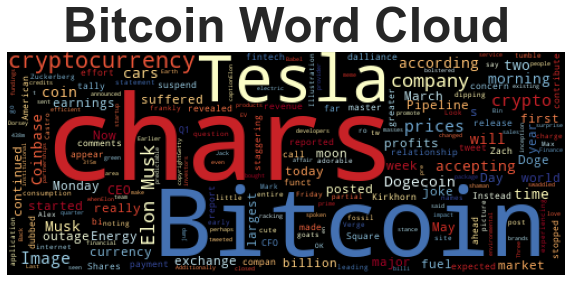

In [63]:
wordcloud(btc.text.str.cat(), title='Bitcoin Word Cloud')

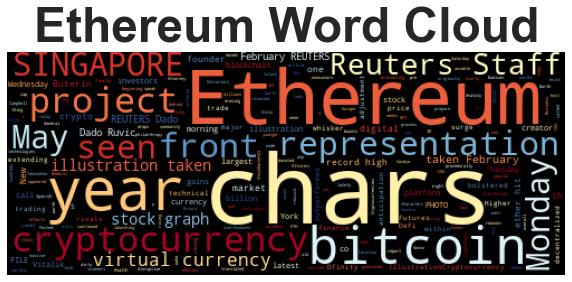

In [64]:
wordcloud(eth.text.str.cat(), title='Ethereum Word Cloud')

In [67]:
all_btc_text = btc.text.str.cat()
doc = nlp(all_btc_text)
doc.user_data['title'] = 'Bitcoin NER'
displacy.render(doc, style='ent', jupyter=True)

In [68]:
for ent in doc.ents:
    print(ent.text, ent.label_)

Just weeks DATE
Tesla ORG
Bitcoin PERSON
Elon Musk PERSON
Square FAC
more than 6% PERCENT
today DATE
American NORP
$5.06 billion MONEY
2021 DATE
3.36 MONEY
CFO ORG
Zach Kirkhorn PERSON
Monday DATE
Tesla ORG
Elon Musk PERSON
Friday DATE
Bitcoin PERSON
50,000 MONEY
first ORDINAL
early March DATE
Bitcoin PERSON
Zuckerberg PERSON
two CARDINAL
Max PERSON
Bitcoin PERSON
Alex Castro PERSON
The Verge

 

 Cryptocurrency ORG
Coinbase PERSON
this morning TIME
Coinbase PERSON
Bin PERSON
+1307 chars]Last week DATE
Musk PERSON
Dogecoin GPE
Elon Musk PERSON
March DATE
Musk PERSON
Tesla PERSON
Earlier this year DATE
EV ORG
1.5 MONEY
Musk PERSON
Tesla PERSON
Tesla PERSON
first quarter DATE
$438m MONEY
315 MONEY
Bitcoin ORG
Jack Dorsey PERSON
Babel Finance ORG
Monday DATE
Elon Musk PERSON
Bitcoin PERSON
Bitcoin PERSON
Ethereum ORG
Altcoins PERSON
Tuesday night TIME
Wednesday DATE
morning TIME
months DATE
hundreds of billions MONEY
CNN ORG
Saturday DATE
about 6% PERCENT
nearly $58,000 MONEY
hours-long T

In [69]:
all_eth_text = eth.text.str.cat()
doc = nlp(all_eth_text)
doc.user_data['title'] = 'Ethereum NER'
displacy.render(doc, style='ent', jupyter=True)

In [70]:
for ent in doc.ents:
    print(ent.text, ent.label_)

Vitalik Buterin PERSON
Ethereum ORG
Wednesday DATE
Ethereum ORG
$1.5 billion MONEY
Buterin PERSON
500 CARDINAL
ETH ORG
North Carolina GPE
Josh Stein PERSON
Madison Campbell PERSON
Liesel Vaidya PERSON
Anatoly Yakovenko PERSON
chars]New York GPE
CNN ORG
Saturday DATE
about 6% PERCENT
nearly $58,000 MONEY
CryptoPunks ORG
one CARDINAL
NFT ORG
Meebits PRODUCT
20,000 CARDINAL
3D ORG
Ethereum ORG
Altcoins PERSON
Tuesday night TIME
Wednesday DATE
morning TIME
months DATE
hundreds of billions MONEY
Reuters ORG
February 19, 2021 DATE
SINGAPORE GPE
February 19, 2021 DATE
Dado Ruvic/IllustrationCryptocurrency PERSON
Dfinity ORG
July 2018 DATE
Swiss NORP
Dominic Williams PERSON
StockMarketUS Stock Futures Edge Higher ORG
Monday DATE
U.S. GPE
Monday DATE
Spanish NORP
AI ORG
Cryptocurrencies ORG
today DATE
Vitalik Buterin PERSON
27-year-old DATE
Reuters ORG
SINGAPORE GPE
May 3 DATE
Reuters ORG
Monday DATE
3,000 MONEY
last weeks DATE
Europe LOC
Dow Jones Indices ORG
February 19, 2021 DATE
Dado Ruvic/

---